In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html
from IPython.display import Image

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
%matplotlib inline

# Datasource: git clone https://github.com/owid/covid-19-data.git
# dataset paths
covid_csv = r'C:\Users\ssptit\OneDrive - SAS\Git\COVID-19 Singapore\public\data\owid-covid-data.csv'

In [2]:
# Load csv and transform date
covid_df = pd.read_csv(covid_csv,encoding='utf8')
covid_df['date'] = covid_df['date'].apply(lambda x: pd.to_datetime(x))
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
# create multiple datasets by country of interest
covid_sg = covid_df[covid_df['iso_code']=="SGP"]
covid_kr = covid_df[covid_df['iso_code']=="KOR"]
covid_jp = covid_df[covid_df['iso_code']=="JPN"]
covid_sg.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
21757,SGP,Asia,Singapore,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62
21758,SGP,Asia,Singapore,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62
21759,SGP,Asia,Singapore,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62
21760,SGP,Asia,Singapore,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62
21761,SGP,Asia,Singapore,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62


In [4]:
# Log transform variables of interest
covid_sg['lg_total_cases'] = covid_sg['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_sg['lg_new_cases'] = covid_sg['new_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_kr['lg_total_cases'] = covid_kr['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_kr['lg_new_cases'] = covid_kr['new_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_jp['lg_total_cases'] = covid_jp['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_jp['lg_new_cases'] = covid_jp['new_cases'].apply(lambda x: np.log(x) if x > 0 else x)

C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWa

In [5]:
covid_sg.set_index('date')

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,lg_total_cases,lg_new_cases
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,SGP,Asia,Singapore,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.000000,0.000000
2020-01-01,SGP,Asia,Singapore,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.000000,0.000000
2020-01-02,SGP,Asia,Singapore,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.000000,0.000000
2020-01-03,SGP,Asia,Singapore,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.000000,0.000000
2020-01-04,SGP,Asia,Singapore,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,SGP,Asia,Singapore,42736.0,113.0,26.0,0.0,7304.871,19.315,4.444,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,10.662797,4.727388
2020-06-27,SGP,Asia,Singapore,42955.0,219.0,26.0,0.0,7342.305,37.434,4.444,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,10.667908,5.389072
2020-06-28,SGP,Asia,Singapore,43246.0,291.0,26.0,0.0,7392.045,49.741,4.444,...,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,10.674660,5.673323


In [90]:
# Get points where circuit breaker started, extended and ended
cb_start = covid_sg.set_index('date').loc['2020-04-07'].new_cases
cb_start_total = covid_sg.set_index('date').loc['2020-04-07'].total_cases
cb_extended = covid_sg.set_index('date').loc['2020-05-04'].new_cases
cb_extended_total = covid_sg.set_index('date').loc['2020-05-04'].total_cases
cb_end = covid_sg.set_index('date').loc['2020-06-01'].new_cases
cb_end_total = covid_sg.set_index('date').loc['2020-06-01'].total_cases
p1_end = covid_sg.set_index('date').loc['2020-06-19'].new_cases
p1_end_total = covid_sg.set_index('date').loc['2020-06-19'].total_cases

cb_lg_start = covid_sg.set_index('date').loc['2020-04-07'].lg_new_cases
cb_lg_start_total = covid_sg.set_index('date').loc['2020-04-07'].lg_total_cases
cb_lg_extended = covid_sg.set_index('date').loc['2020-05-04'].lg_new_cases
cb_lg_extended_total = covid_sg.set_index('date').loc['2020-05-04'].lg_total_cases
cb_lg_end = covid_sg.set_index('date').loc['2020-06-01'].lg_new_cases
cb_lg_end_total = covid_sg.set_index('date').loc['2020-06-01'].lg_total_cases
p1_lg_end = covid_sg.set_index('date').loc['2020-06-19'].lg_new_cases
p1_lg_end_total = covid_sg.set_index('date').loc['2020-06-19'].lg_total_cases

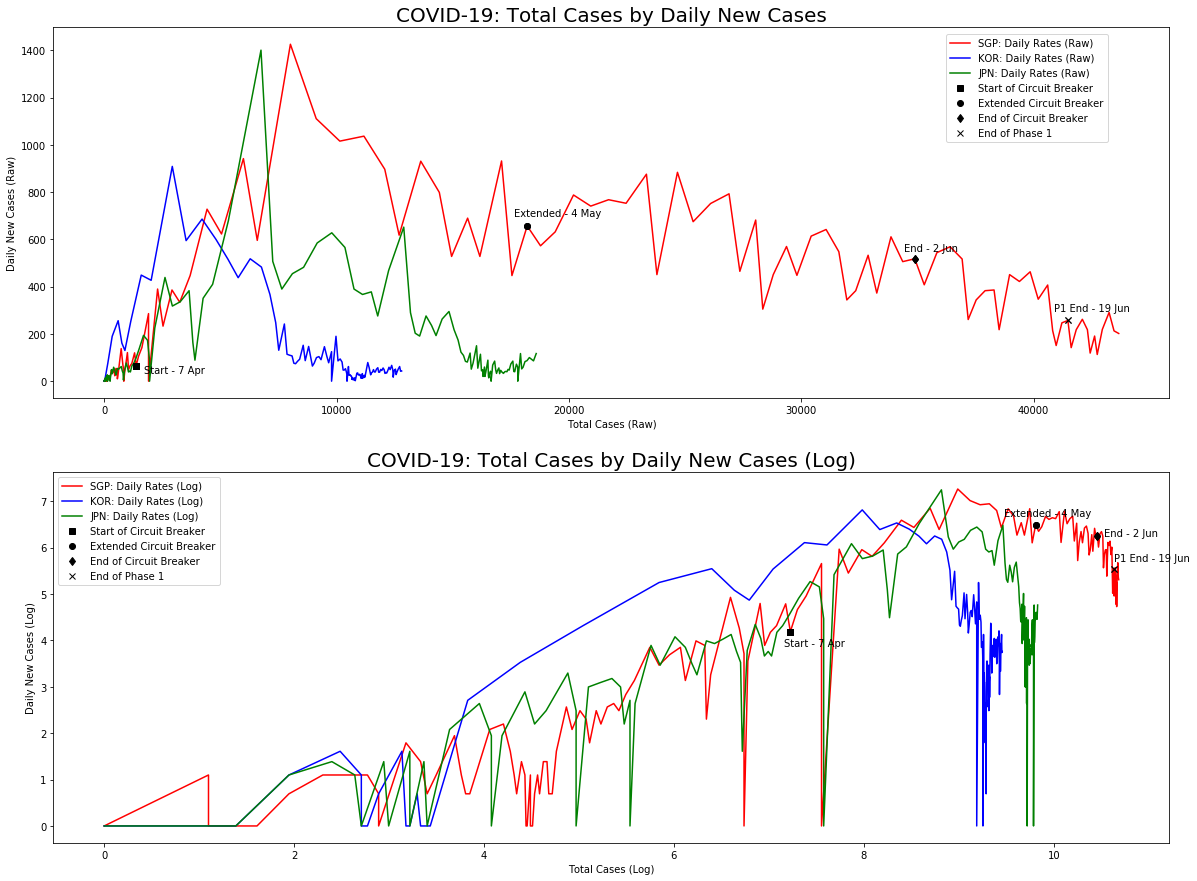

In [111]:
fig, axes = plt.subplots(figsize=(20,15),nrows=2,ncols=1)
# fig.suptitle("COVID-19: Total Cases by Daily New Cases",size=28)

# Plot curves
axes[0].plot(covid_sg['total_cases'],covid_sg['new_cases'],'r',label="SGP: Daily Rates (Raw)")
axes[0].plot(covid_kr['total_cases'],covid_kr['new_cases'],'b',label="KOR: Daily Rates (Raw)")
axes[0].plot(covid_jp['total_cases'],covid_jp['new_cases'],'g',label="JPN: Daily Rates (Raw)")

# Plot test cases
# ax1 = axes[0].twinx()
# ax1.plot(covid_sg['total_cases'],covid_sg['new_tests_smoothed_per_thousand'],'-.r',label="SGP: New Tests Smoothed Per Thousand")
# ax1.plot(covid_kr['total_cases'],covid_kr['new_tests_smoothed_per_thousand'],'-.b',label="KOR: New Tests Smoothed Per Thousand")
# ax1.plot(covid_jp['total_cases'],covid_jp['new_tests_smoothed_per_thousand'],'-.g',label="JPN: New Tests Smoothed Per Thousand")

# Create reference lines
axes[0].plot([cb_start_total,cb_start_total],[cb_start,cb_start],'sk',label="Start of Circuit Breaker")
axes[0].annotate("Start - 7 Apr",(0,0),textcoords="offset points",xytext=(40,8))
axes[0].plot([cb_extended_total,cb_extended_total],[cb_extended,cb_extended],'ok',label="Extended Circuit Breaker")
axes[0].annotate("Extended - 4 May",(0,0),textcoords="offset points",xytext=(410,165))
axes[0].plot([cb_end_total,cb_end_total],[cb_end,cb_end],'dk',label="End of Circuit Breaker")
axes[0].annotate("End - 2 Jun",(0,0),textcoords="offset points",xytext=(800,130))
axes[0].plot([p1_end_total,p1_end_total],[p1_end,p1_end],'xk',label="End of Phase 1")
axes[0].annotate("P1 End - 19 Jun",(0,0),textcoords="offset points",xytext=(950,70))

# Plot
axes[0].set_xlabel('Total Cases (Raw)')
axes[0].set_ylabel('Daily New Cases (Raw)')
axes[0].set_title('COVID-19: Total Cases by Daily New Cases',size=20)
# ax1.set_ylabel('New Tests Smoothed Per Thousand')
axes[0].legend(loc=(0.80,0.69))
# ax1.legend(loc=(0.78,0.60))

# Plot curves
axes[1].plot(covid_sg['lg_total_cases'],covid_sg['lg_new_cases'],'r',label="SGP: Daily Rates (Log)")
axes[1].plot(covid_kr['lg_total_cases'],covid_kr['lg_new_cases'],'b',label="KOR: Daily Rates (Log)")
axes[1].plot(covid_jp['lg_total_cases'],covid_jp['lg_new_cases'],'g',label="JPN: Daily Rates (Log)")

# Create reference lines
axes[1].plot([cb_lg_start_total,cb_lg_start_total],[cb_lg_start,cb_lg_start],'sk',label="Start of Circuit Breaker")
axes[1].annotate("Start - 7 Apr",(0,0),textcoords="offset points",xytext=(680,180))
axes[1].plot([cb_lg_extended_total,cb_lg_extended_total],[cb_lg_extended,cb_lg_extended],'ok',label="Extended Circuit Breaker")
axes[1].annotate("Extended - 4 May",(0,0),textcoords="offset points",xytext=(900,310))
axes[1].plot([cb_lg_end_total,cb_lg_end_total],[cb_lg_end,cb_lg_end],'dk',label="End of Circuit Breaker")
axes[1].annotate("End - 2 Jun",(0,0),textcoords="offset points",xytext=(1000,290))
axes[1].plot([p1_lg_end_total,p1_lg_end_total],[p1_lg_end,p1_lg_end],'xk',label="End of Phase 1")
axes[1].annotate("P1 End - 19 Jun",(0,0),textcoords="offset points",xytext=(1010,265))

# Plot
axes[1].set_xlabel('Total Cases (Log)')
axes[1].set_ylabel('Daily New Cases (Log)')
axes[1].set_title('COVID-19: Total Cases by Daily New Cases (Log)',size=20)
axes[1].legend()

In [8]:
# Data prep for SGP

# Add week number
covid_sg['week_no'] = covid_sg['date'].apply(lambda x: x.week)

# Group by week number
covid_sg_groupby = covid_sg.groupby("week_no")

# Get last instances of by-groups
weekly_covid_sg = covid_sg_groupby.last()

# Calculate weekly averages (NOTE: SG does not have daily test rates per thousand, only a weekly rate)
weekly_average = []
for i in range(1,len(covid_sg_groupby.size())+1):
    weekly_average.append(round(covid_sg_groupby.get_group(i).mean().new_cases,2))

# Create weekly average column
weekly_covid_sg['weekly_average'] = weekly_average

# log transform total cases and weekly average
weekly_covid_sg['lg_total_cases'] = weekly_covid_sg['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
weekly_covid_sg['lg_weekly_average'] = weekly_covid_sg['weekly_average'].apply(lambda x: np.log(x) if x > 0 else x)

# Data prep for KOR

# Add week number
covid_kr['week_no'] = covid_kr['date'].apply(lambda x: x.week)

# Group by week number
covid_kr_groupby = covid_kr.groupby("week_no")

# Get last instances of by-groups
weekly_covid_kr = covid_kr_groupby.last()

# Calculate weekly averages
weekly_average = []
weekly_average_tests = [] # calculate average weekly test rates for comparison with SG
for i in range(1,len(covid_kr_groupby.size())+1):
    weekly_average.append(round(covid_kr_groupby.get_group(i).mean().new_cases,2))
    weekly_average_tests.append(round(covid_kr_groupby.get_group(i).mean().total_tests_per_thousand,2))

# Create weekly average column
weekly_covid_kr['weekly_average'] = weekly_average
weekly_covid_kr['weekly_average_tests'] = weekly_average_tests

# log transform total cases and weekly average
weekly_covid_kr['lg_total_cases'] = weekly_covid_kr['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
weekly_covid_kr['lg_weekly_average'] = weekly_covid_kr['weekly_average'].apply(lambda x: np.log(x) if x > 0 else x)

# Data prep for JPN

# Add week number
covid_jp['week_no'] = covid_jp['date'].apply(lambda x: x.week)

# Group by week number
covid_jp_groupby = covid_jp.groupby("week_no")

# Get last instances of by-groups
weekly_covid_jp = covid_jp_groupby.last()

# Calculate weekly averages
weekly_average = []
weekly_average_tests = [] # calculate average weekly test rates for comparison with SG
for i in range(1,len(covid_jp_groupby.size())+1):
    weekly_average.append(round(covid_jp_groupby.get_group(i).mean().new_cases,2))
    weekly_average_tests.append(round(covid_jp_groupby.get_group(i).mean().total_tests_per_thousand,2))

# Create weekly average column
weekly_covid_jp['weekly_average'] = weekly_average
weekly_covid_jp['weekly_average_tests'] = weekly_average_tests

# log transform total cases and weekly average
weekly_covid_jp['lg_total_cases'] = weekly_covid_jp['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
weekly_covid_jp['lg_weekly_average'] = weekly_covid_jp['weekly_average'].apply(lambda x: np.log(x) if x > 0 else x)

display_side_by_side(weekly_covid_sg.head(),weekly_covid_jp.head(),weekly_covid_kr.head())

C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a co

iso_code 
 continent 
 location 
 date 
 total_cases 
 new_cases 
 total_deaths 
 new_deaths 
 total_cases_per_million 
 new_cases_per_million 
 total_deaths_per_million 
 new_deaths_per_million 
 total_tests 
 new_tests 
 total_tests_per_thousand 
 new_tests_per_thousand 
 new_tests_smoothed 
 new_tests_smoothed_per_thousand 
 tests_units 
 stringency_index 
 population 
 population_density 
 median_age 
 aged_65_older 
 aged_70_older 
 gdp_per_capita 
 extreme_poverty 
 cvd_death_rate 
 diabetes_prevalence 
 female_smokers 
 male_smokers 
 handwashing_facilities 
 hospital_beds_per_thousand 
 life_expectancy 
 lg_total_cases 
 lg_new_cases 
 weekly_average 
 lg_weekly_average 
 
 
 week_no 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 SGP 
 Asia 
 Singapore 
 2020-01-05 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 13.89 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 83.62 
 0.000000 
 0.000000 
 0.00 
 0.000000 
 
 
 2 
 SGP 
 Asia 
 Singapore 
 2020-01-12 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 13.89 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 83.62 
 0.000000 
 0.000000 
 0.00 
 0.000000 
 
 
 3 
 SGP 
 Asia 
 Singapore 
 2020-01-19 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 13.89 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 83.62 
 0.000000 
 0.000000 
 0.00 
 0.000000 
 
 
 4 
 SGP 
 Asia 
 Singapore 
 2020-01-26 
 4.0 
 1.0 
 0.0 
 0.0 
 0.684 
 0.171 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 19.44 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 83.62 
 1.386294 
 0.000000 
 0.57 
 -0.562119 
 
 
 5 
 SGP 
 Asia 
 Singapore 
 2020-02-02 
 18.0 
 2.0 
 0.0 
 0.0 
 3.077 
 0.342 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 19.44 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 83.62 
 2.890372 
 0.693147 
 2.00 
 0.693147 
 
 
 
 
 
 
 iso_code 
 continent 
 location 
 date 
 total_cases 
 new_cases 
 total_deaths 
 new_deaths 
 total_cases_per_million 
 new_cases_per_million 
 total_deaths_per_million 
 new_deaths_per_million 
 total_tests 
 new_tests 
 total_tests_per_thousand 
 new_tests_per_thousand 
 new_tests_smoothed 
 new_tests_smoothed_per_thousand 
 tests_units 
 stringency_index 
 population 
 population_density 
 median_age 
 aged_65_older 
 aged_70_older 
 gdp_per_capita 
 extreme_poverty 
 cvd_death_rate 
 diabetes_prevalence 
 female_smokers 
 male_smokers 
 handwashing_facilities 
 hospital_beds_per_thousand 
 life_expectancy 
 lg_total_cases 
 lg_new_cases 
 weekly_average 
 weekly_average_tests 
 lg_weekly_average 
 
 
 week_no 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 JPN 
 Asia 
 Japan 
 2020-01-05 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.00 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 33.7 
 NaN 
 13.05 
 84.63 
 0.000000 
 0.000000 
 0.00 
 NaN 
 0.000000 
 
 
 2 
 JPN 
 Asia 
 Japan 
 2020-01-12 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.78 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 33.7 
 NaN 
 13.05 
 84.63 
 0.000000 
 0.000000 
 0.00 
 NaN 
 0.000000 
 
 
 3 
 JPN 
 Asia 
 Japan 
 2020-01-19 
 1.0 
 0.0 
 0.0 
 0.0 
 0.008 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.78 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 33.7 
 NaN 
 13.05 
 84.63 
 0.000

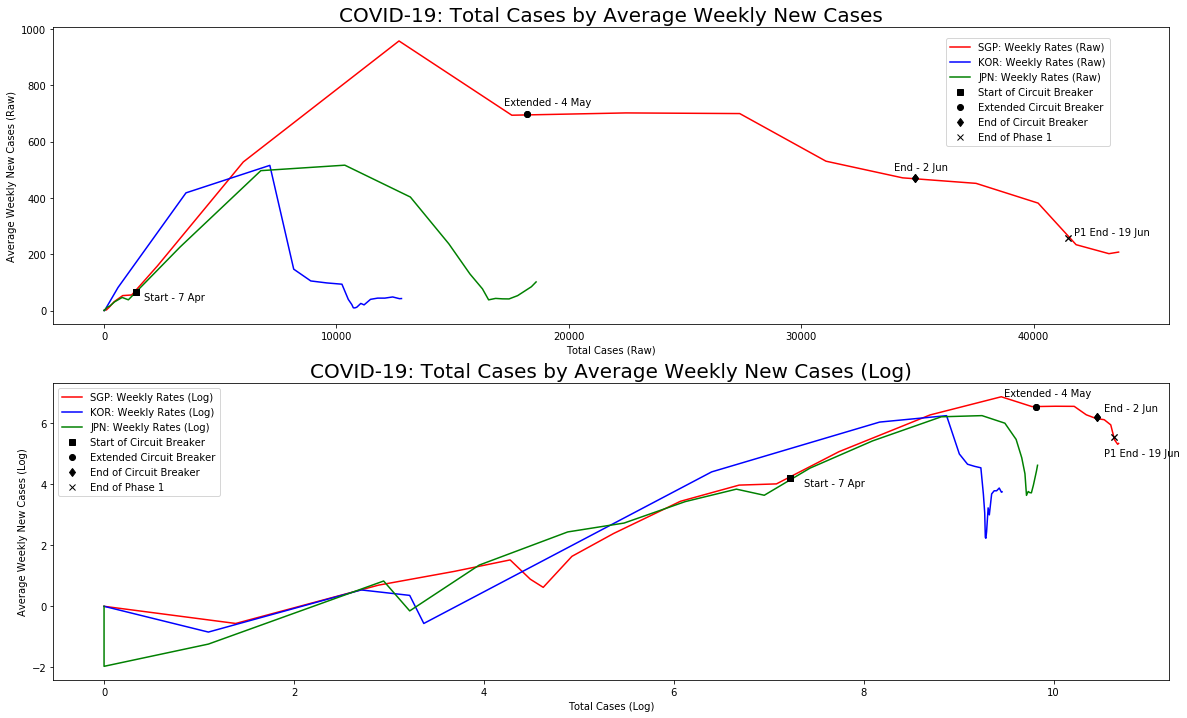

In [165]:
fig, axes = plt.subplots(figsize=(20,12),nrows=2,ncols=1)
# fig.suptitle("COVID-19: Total Cases by Average Weekly New Cases",size=28)

# Plot curves
axes[0].plot(weekly_covid_sg['total_cases'],weekly_covid_sg['weekly_average'],'r',label="SGP: Weekly Rates (Raw)")
axes[0].plot(weekly_covid_kr['total_cases'],weekly_covid_kr['weekly_average'],'b',label="KOR: Weekly Rates (Raw)")
axes[0].plot(weekly_covid_jp['total_cases'],weekly_covid_jp['weekly_average'],'g',label="JPN: Weekly Rates (Raw)")

# Create reference lines
axes[0].plot([cb_start_total,cb_start_total],[cb_start,cb_start],'sk',label="Start of Circuit Breaker")
axes[0].annotate("Start - 7 Apr",(0,0),textcoords="offset points",xytext=(40,10))
axes[0].plot([cb_extended_total,cb_extended_total],[cb_extended+40,cb_extended+40],'ok',label="Extended Circuit Breaker")
axes[0].annotate("Extended - 4 May",(0,0),textcoords="offset points",xytext=(400,205))
axes[0].plot([cb_end_total,cb_end_total],[cb_end-48,cb_end-48],'dk',label="End of Circuit Breaker")
axes[0].annotate("End - 2 Jun",(0,0),textcoords="offset points",xytext=(790,140))
axes[0].plot([p1_end_total,p1_end_total],[p1_end,p1_end],'xk',label="End of Phase 1")
axes[0].annotate("P1 End - 19 Jun",(0,0),textcoords="offset points",xytext=(970,75))

# Plot
axes[0].set_xlabel('Total Cases (Raw)')
axes[0].set_ylabel('Average Weekly New Cases (Raw)')
axes[0].set_title('COVID-19: Total Cases by Average Weekly New Cases',size=20)
axes[0].legend(loc=(0.8,0.6))

# Plot curves
axes[1].plot(weekly_covid_sg['lg_total_cases'],weekly_covid_sg['lg_weekly_average'],'r',label="SGP: Weekly Rates (Log)")
axes[1].plot(weekly_covid_kr['lg_total_cases'],weekly_covid_kr['lg_weekly_average'],'b',label="KOR: Weekly Rates (Log)")
axes[1].plot(weekly_covid_jp['lg_total_cases'],weekly_covid_jp['lg_weekly_average'],'g',label="JPN: Weekly Rates (Log)")

# Create reference lines
axes[1].plot([cb_lg_start_total,cb_lg_start_total],[cb_lg_start,cb_lg_start],'sk',label="Start of Circuit Breaker")
axes[1].annotate("Start - 7 Apr",(0,0),textcoords="offset points",xytext=(700,120))
axes[1].plot([cb_lg_extended_total,cb_lg_extended_total],[cb_lg_extended+0.05,cb_lg_extended+0.05],'ok',label="Extended Circuit Breaker")
axes[1].annotate("Extended - 4 May",(0,0),textcoords="offset points",xytext=(900,210))
axes[1].plot([cb_lg_end_total,cb_lg_end_total],[cb_lg_end-0.05,cb_lg_end-0.05],'dk',label="End of Circuit Breaker")
axes[1].annotate("End - 2 Jun",(0,0),textcoords="offset points",xytext=(1000,195))
axes[1].plot([p1_lg_end_total,p1_lg_end_total],[p1_lg_end,p1_lg_end],'xk',label="End of Phase 1")
axes[1].annotate("P1 End - 19 Jun",(0,0),textcoords="offset points",xytext=(1000,150))


#plot
axes[1].set_xlabel('Total Cases (Log)')
axes[1].set_ylabel('Average Weekly New Cases (Log)')
axes[1].set_title('COVID-19: Total Cases by Average Weekly New Cases (Log)',size=20)
axes[1].legend()

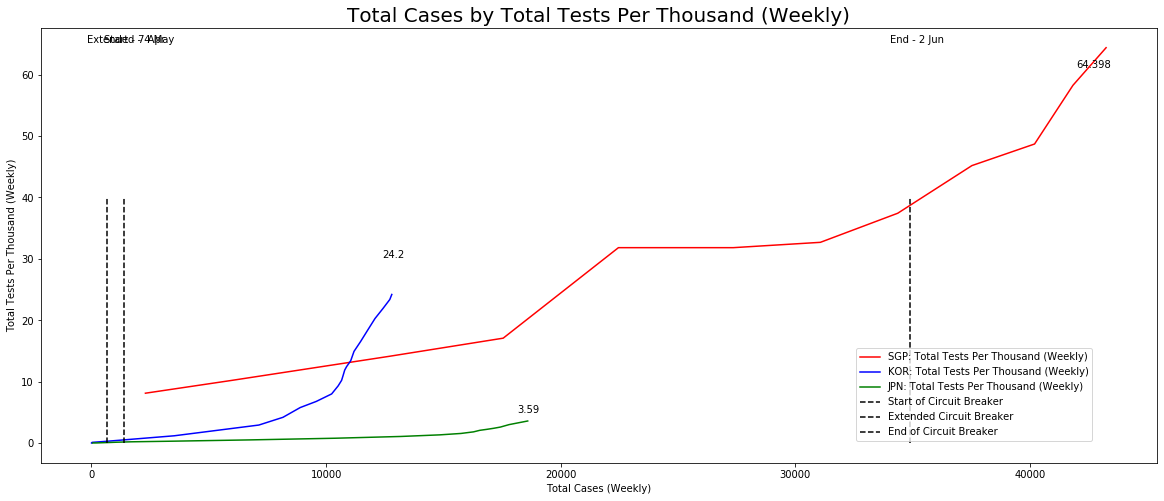

In [53]:
# Impute missing value for SG tests per thousand in week 20 with value from week 19. i.e. no new tests performed
weekly_covid_sg.loc[20,'total_tests_per_thousand']=weekly_covid_sg.loc[19,'total_tests_per_thousand']

fig,axes = plt.subplots(figsize=(20,8),nrows=1,ncols=1)

# Plot curves
axes.plot(weekly_covid_sg['total_cases'],weekly_covid_sg['total_tests_per_thousand'],'r',label="SGP: Total Tests Per Thousand (Weekly)")
axes.plot(weekly_covid_kr['total_cases'],weekly_covid_kr['weekly_average_tests'],'b',label="KOR: Total Tests Per Thousand (Weekly)")
axes.plot(weekly_covid_jp['total_cases'],weekly_covid_jp['weekly_average_tests'],'g',label="JPN: Total Tests Per Thousand (Weekly)")

# Create reference lines
axes.plot([cb_start,cb_start],[0,40],'--k',label="Start of Circuit Breaker")
axes.annotate("Start - 7 Apr",(cb_start,0),textcoords="offset points",xytext=(-20,400))
axes.plot([cb_extended,cb_extended],[0,40],'--k',label="Extended Circuit Breaker")
axes.annotate("Extended - 4 May",(cb_extended,0),textcoords="offset points",xytext=(-20,400))
axes.plot([cb_end,cb_end],[0,40],'--k',label="End of Circuit Breaker")
axes.annotate("End - 2 Jun",(cb_end,0),textcoords="offset points",xytext=(-20,400))

# Add the last reference point for total tests per thousand
axes.annotate(weekly_covid_sg['total_tests_per_thousand'].to_list()[-2],(weekly_covid_sg['total_cases'].to_list()[-1],0),textcoords="offset points",xytext=(-40,375))
axes.annotate(weekly_covid_kr['weekly_average_tests'].to_list()[-1],(weekly_covid_kr['total_cases'].to_list()[-1],0),textcoords="offset points",xytext=(-10,185))
axes.annotate(weekly_covid_jp['weekly_average_tests'].to_list()[-1],(weekly_covid_jp['total_cases'].to_list()[-1],0),textcoords="offset points",xytext=(-10,30))

# Plot
axes.set_xlabel('Total Cases (Weekly)')
axes.set_ylabel('Total Tests Per Thousand (Weekly)')
axes.set_title('Total Cases by Total Tests Per Thousand (Weekly)', size=20)
axes.legend(loc=(0.73,0.05))